# Problem statement:- 
This is data set of one of the truck company, who wants to do predictive analysis on manitainance parameter so that they can predict device failure before truck goes out for its delivery, so we need to develop algorithm which can predict which truck should not go out for delivery.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.model_selection import train_test_split as tts #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [3]:
df=pd.read_csv('failures.csv')

In [5]:
df_prep=df.copy()

In [14]:
df_prep['month'] = df_prep.date.map(lambda x: x.split('-')[1])

In [15]:
df_prep.head()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,month
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7,01
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0,01
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0,01
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0,01
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3,01


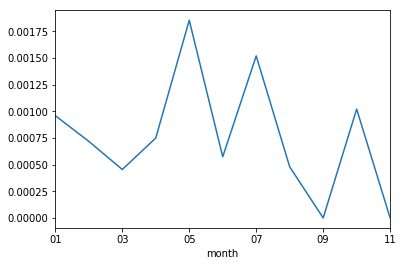

In [16]:
df_prep.groupby('month')['failure'].mean().plot()

In [21]:
defaultid = df_prep[df_prep.failure == 1].device.unique()

In [34]:
defaultid.shape

(106,)

In [54]:
defaults=df_prep[df_prep.device.isin(defaultid)]

In [55]:
defaults.head()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,month
7,2015-01-01,S1F023H2,0,141503600,0,0,1,19,494462,16,16,3,01
23,2015-01-01,S1F03YZM,0,55587136,0,0,0,7,199132,0,0,0,01
44,2015-01-01,S1F09DZQ,0,12568128,136,0,2,6,380112,0,0,2,01
63,2015-01-01,S1F0CTDN,0,50147888,528,0,4,9,381198,32,32,3,01
74,2015-01-01,S1F0DSTY,0,8471680,0,0,0,11,436682,0,0,0,01


In [56]:
defaults.shape

(10713, 13)

In [65]:
defaults.device.nunique()

106

In [59]:
defaults1=df_prep[~df_prep.device.isin(defaultid)]

In [60]:
defaults1.shape

(113781, 13)

In [62]:
defaults1[defaults1.device=='S1F03YZM']

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,month


In [64]:
defaults1.device.nunique()

1062

In [43]:
df.device.nunique()

1168

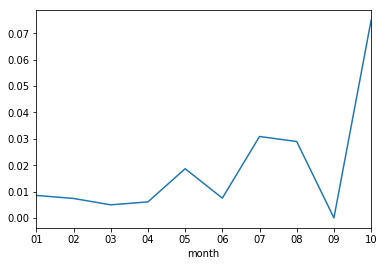

In [33]:
defaults.groupby('month')['failure'].mean().plot()

In [66]:
defaults.groupby('month')['failure'].count()

month
01    2812
02    1897
03    1813
04    1481
05    1125
06     799
07     518
08     138
09      90
10      40
Name: failure, dtype: int64

In [4]:
df.head(),df.tail(),df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
date          124494 non-null object
device        124494 non-null object
failure       124494 non-null int64
attribute1    124494 non-null int64
attribute2    124494 non-null int64
attribute3    124494 non-null int64
attribute4    124494 non-null int64
attribute5    124494 non-null int64
attribute6    124494 non-null int64
attribute7    124494 non-null int64
attribute8    124494 non-null int64
attribute9    124494 non-null int64
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


(         date    device  failure  attribute1  attribute2  attribute3  \
 0  2015-01-01  S1F01085        0   215630672          56           0   
 1  2015-01-01  S1F0166B        0    61370680           0           3   
 2  2015-01-01  S1F01E6Y        0   173295968           0           0   
 3  2015-01-01  S1F01JE0        0    79694024           0           0   
 4  2015-01-01  S1F01R2B        0   135970480           0           0   
 
    attribute4  attribute5  attribute6  attribute7  attribute8  attribute9  
 0          52           6      407438           0           0           7  
 1           0           6      403174           0           0           0  
 2           0          12      237394           0           0           0  
 3           0           6      410186           0           0           0  
 4           0          15      313173           0           0           3  ,
               date    device  failure  attribute1  attribute2  attribute3  \
 124489  2015-11-02

In [7]:
df.isnull().sum()

date          0
device        0
failure       0
attribute1    0
attribute2    0
attribute3    0
attribute4    0
attribute5    0
attribute6    0
attribute7    0
attribute8    0
attribute9    0
dtype: int64

In [8]:
df.dtypes

date          object
device        object
failure        int64
attribute1     int64
attribute2     int64
attribute3     int64
attribute4     int64
attribute5     int64
attribute6     int64
attribute7     int64
attribute8     int64
attribute9     int64
dtype: object

# 1. Need to convert date in to datetime format
# 2. classify  attribute for categorical & continues

In [9]:
df.failure.value_counts()

0    124388
1       106
Name: failure, dtype: int64

# Highly imbalanced data with failure rate less then 0.9 %

In [11]:
df.describe()

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
count,124494.000000,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000
mean,0.000851,1.223868e+08,159.484762,9.940455,1.741120,14.222693,260172.858025,0.292528,0.292528,12.451524
std,0.029167,7.045960e+07,2179.657730,185.747321,22.908507,15.943021,99151.009852,7.436924,7.436924,191.425623
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000
25%,0.000000,6.127675e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,0.000000,0.000000
50%,0.000000,1.227957e+08,0.000000,0.000000,0.000000,10.000000,249799.500000,0.000000,0.000000,0.000000
75%,0.000000,1.833084e+08,0.000000,0.000000,0.000000,12.000000,310266.000000,0.000000,0.000000,0.000000
max,1.000000,2.441405e+08,64968.000000,24929.000000,1666.000000,98.000000,689161.000000,832.000000,832.000000,18701.000000


In [12]:
#fig = plt.figure(figsize = (10,5))
#plt.plot(df.attribute5,df.failure,'o')
#plt.title("Relationship between attributes")
#plt.xlabel('X (Attribute3)')
#plt.ylabel('Y (failure)')

In [18]:
df.attribute2.unique(),df.attribute1.unique(),df.attribute6.unique()

(array([   56,     0,  1536,   168,  5160,   392,  1984,   192,   496,
          928,  1952,   128,   744,   136,  7928,   360,     8,   464,
        21528,  1392,   352,  7448,   104,   528,   800,   520,  1888,
         1232,   368,  6336, 17408,  1056,  1160,  2288,  1184,    32,
        64728,   712,  7024,   424, 54896,  1080,  2336,  4960,  5560,
          992,   112,    72,    16,   792, 64776,  4768,   944,   600,
         6328,   160,  1064,  1552,  6264,   440,  4072,  4240,  1960,
          256,   736, 44008,  2000,   376,    24,    40,    80,   344,
         1936,   232, 24656,   728,   240,  1208,  7944,  7800,  1912,
         1248, 56736,   280,  6280,   512,  8392,   504, 21544,  8120,
         6128, 54752,   632,  1072,  6288,  2008,   680,  1944,  1592,
         2016,   752,   144, 21928,  8160,   808,  1152,  1176, 61592,
        47944,   120,  6352,  4248,  1656,  2024,   936,   760, 21944,
         1400,  8688,   816,  6360, 10096, 49768, 64784,   288,  1664,
      

/Users/SKYLER/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
/Users/SKYLER/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


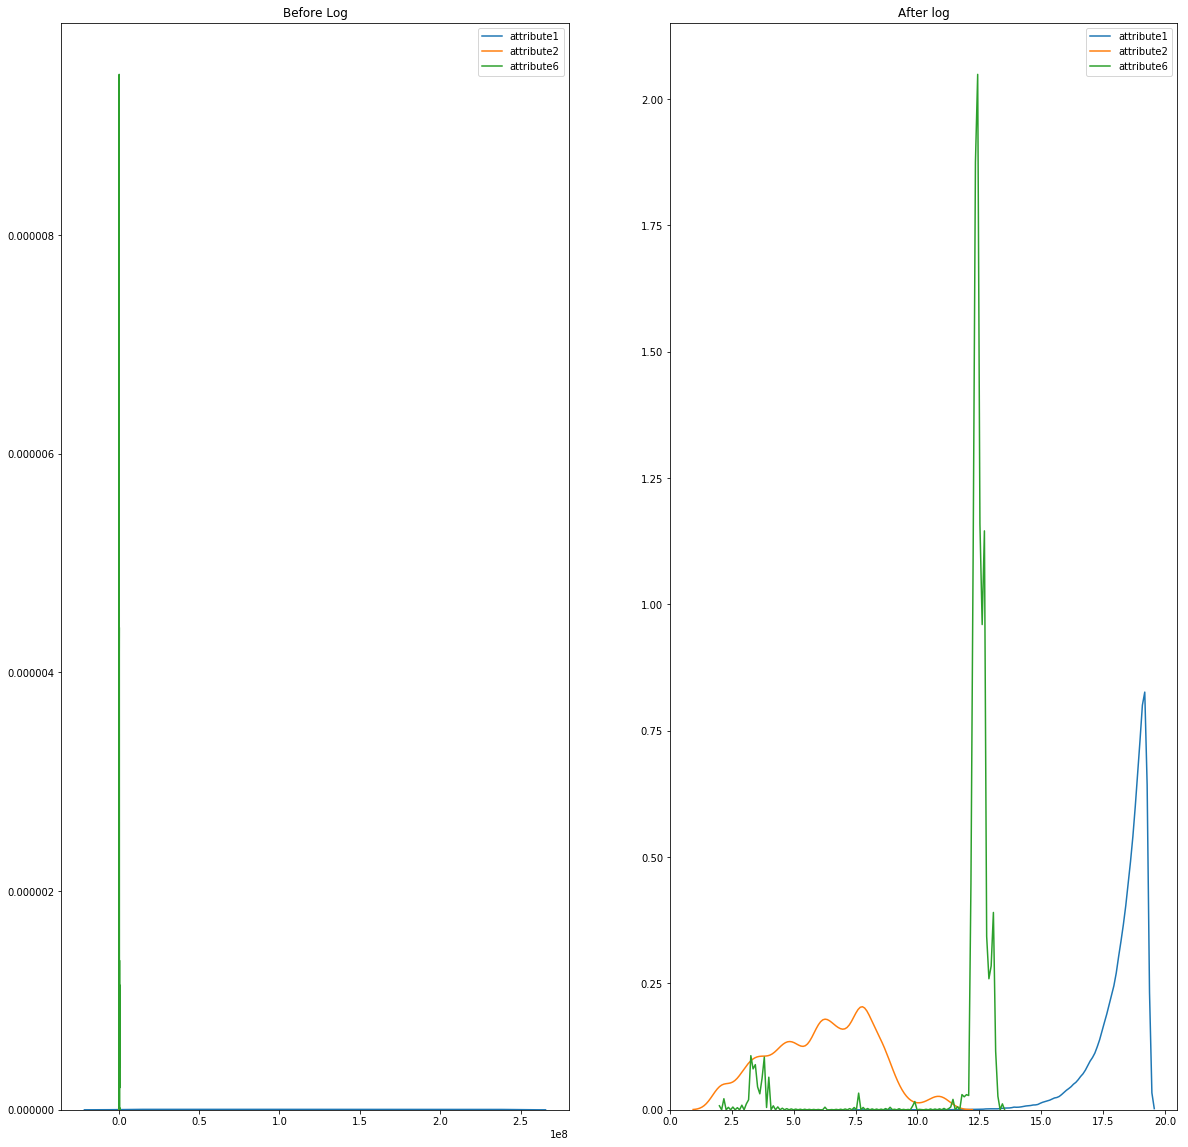

In [19]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 20))

ax1.set_title('Before Log')
sns.kdeplot((df['attribute1']), ax=ax1)
sns.kdeplot((df['attribute2']), ax=ax1)
sns.kdeplot((df['attribute6']), ax=ax1)
ax2.set_title('After log')
sns.kdeplot(np.log(df['attribute1']), ax=ax2)
sns.kdeplot(np.log(df['attribute2']), ax=ax2)
sns.kdeplot(np.log(df['attribute6']), ax=ax2)
plt.show()

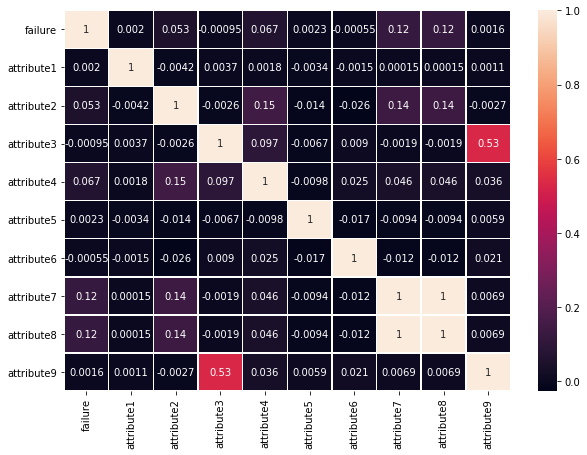

In [20]:
fig, ax = plt.subplots(figsize=(10, 7))
Corr = df[df.columns].corr()
sns.heatmap(Corr,annot=True,linewidths=0.5)

attribute7 & attribute8 column are same

attribute3 & attribute9 have good correlaton but its not too high

Text(0,0.5,'Y (Attribute3)')

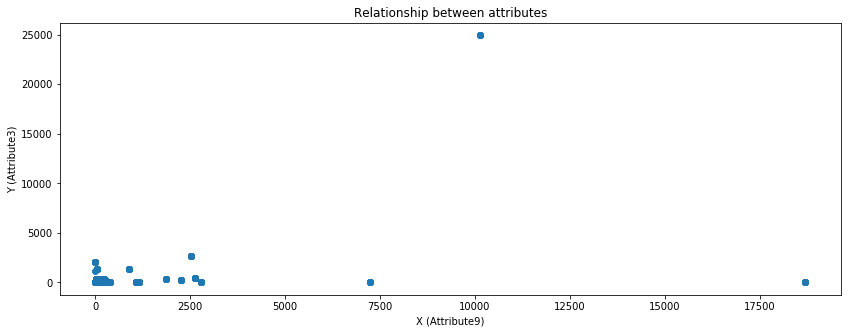

In [21]:
fig = plt.figure(figsize = (14,5))
plt.plot(df.attribute9,df.attribute3,'o')
plt.title("Relationship between attributes")
plt.xlabel('X (Attribute9)')
plt.ylabel('Y (Attribute3)')

In [22]:
df1=df[df['failure']==1]

Text(0,0.5,'Y (Attribute3)')

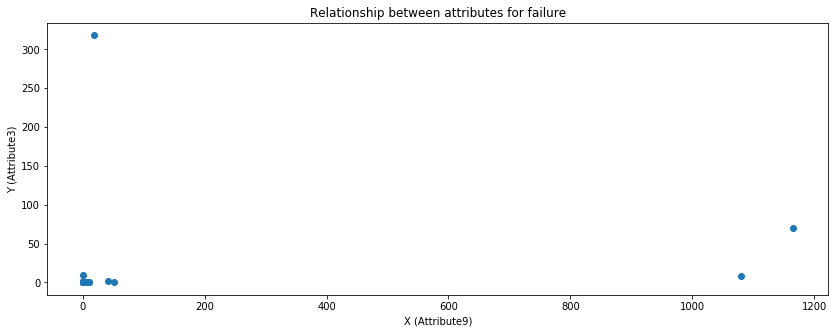

In [23]:
fig = plt.figure(figsize = (14,5))
plt.plot(df1.attribute9,df1.attribute3,'o')
plt.title("Relationship between attributes for failure")
plt.xlabel('X (Attribute9)')
plt.ylabel('Y (Attribute3)')

In [24]:
df2=df[df['failure']==0]

Text(0,0.5,'Y (Attribute3)')

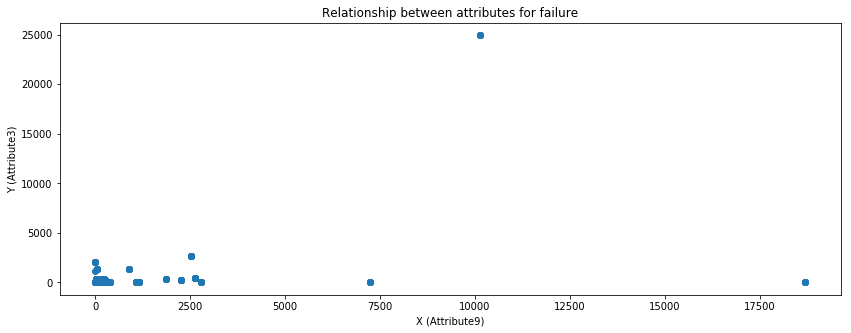

In [25]:
fig = plt.figure(figsize = (14,5))
plt.plot(df2.attribute9,df2.attribute3,'o')
plt.title("Relationship between attributes for failure")
plt.xlabel('X (Attribute9)')
plt.ylabel('Y (Attribute3)')

Convert date to datetime format & extract number of woring days for machine till installation

In [27]:
#df['day']=df['date'].apply(lambda x: x.strftime('%d'))
#df['month']=df['date'].apply(lambda x: x.strftime('%m'))
#df['year']=df['date'].apply(lambda x: x.strftime('%Y'))

#df['day']=df['day'].astype('int')
#df['month']=df['month'].astype('int')
#df['year']=df['year'].astype('int')

In [28]:
df['date'] = pd.to_datetime(df['date'])

In [29]:
df['work_days']=df.groupby('device')['date'].rank(method='dense')

In [96]:
df.tail(50)

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,work_days
124444,2015-10-31,W1F05X69,0,154942192,0,0,2,5,348867,0,0,4,303.0
124445,2015-10-31,W1F0FEH7,0,137545632,0,0,0,12,357925,0,0,0,303.0
124446,2015-10-31,W1F0FY92,0,81032808,0,1,6,15,353661,0,0,1,303.0
124447,2015-10-31,W1F0FZPA,0,106998760,0,0,0,15,353321,0,0,0,303.0
124448,2015-10-31,W1F0G9T7,0,5600008,0,0,0,13,352805,104,104,2,303.0
124449,2015-10-31,W1F0JH87,0,213846176,0,4,0,11,352551,0,0,0,303.0
124450,2015-10-31,W1F0JXDL,0,33975240,160,0,0,10,354969,0,0,0,303.0
124451,2015-10-31,W1F0JY02,0,1401232,0,0,0,8,350759,0,0,0,303.0
124452,2015-10-31,W1F0N84F,0,74954920,0,0,0,8,401101,0,0,1,275.0
124453,2015-10-31,W1F0SJJ2,0,144542632,0,0,0,12,355333,0,0,0,303.0


In [ ]:
#df['total_trip']=df.groupby(['device'])['work_days'].count()
#df['total_failure']=df.groupby('device')['failure'].sum()

# Try to reduce imbalance data

In [33]:
prep=df.groupby(['device']).max()

In [40]:
prep=prep.reset_index(0)

In [41]:
prep.head()

,device,date,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,work_days
0,S1F01085,2015-01-06,0,215630672,56,0,52,6,409404,0,0,7,6.0
1,S1F013BB,2015-05-11,0,243346080,0,0,0,5,689161,0,0,0,6.0
2,S1F0166B,2015-01-06,0,224339296,0,3,0,6,404786,0,0,0,6.0
3,S1F01E6Y,2015-02-17,0,240257968,0,0,0,12,259491,0,0,0,48.0
4,S1F01JE0,2015-01-06,0,235562856,0,0,0,6,412151,0,0,0,6.0


# For Undersampling using resemble 

In [42]:
from sklearn.utils import resample
prep_nonfailure = prep[prep['failure'] == 0]
prep_failure = prep[prep['failure']==1]
prep_nonfailure_undersample = resample(prep_nonfailure,replace=False,n_samples = 106,\
                                    random_state=23)
prep_resampled = pd.concat([prep_nonfailure_undersample,prep_failure])

prep_y = prep_resampled['failure']

# Dropping unwanted columns

In [44]:
prep_resampled = prep_resampled.drop(['failure','date','device','attribute8'],axis = 1)

# Now Scaling attribute 1 to 9 

In [46]:
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [47]:
prep_sc=preprocessing.StandardScaler()
x_std = prep_sc.fit_transform(prep_resampled)
data_scaled = pd.DataFrame(x_std)

# Modeling

In [97]:

from sklearn.cross_validation import train_test_split as tts
X_train, X_test, y_train, y_test = tts(data_scaled,prep_y, train_size = 0.8, random_state=20)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((169, 9), (43, 9), (169,), (43,))

# Define Metrics Function to evaluate a model

In [98]:
def Metrics(y_test,pred):
    print('accuray:', accuracy_score(y_test,pred),',recall score:',recall_score(y_test,pred),'\n ConfusionMatrix: \n',confusion_matrix(y_test,pred))
    #model_rf.feature_importances_
    print('Precision Score:',precision_score(y_test,pred),'F1_score:',f1_score(y_test,pred))

# 1. Decision Tree Classifier

In [99]:
from sklearn.metrics import accuracy_score,recall_score, confusion_matrix, roc_curve, precision_score, f1_score
DT = DecisionTreeClassifier(random_state=12)
model_dt = DT.fit(X_train,y_train)
pred_dt=model_dt.predict(X_test)
Metrics(y_test,pred_dt)

accuray: 0.837209302326 ,recall score: 0.791666666667 
 ConfusionMatrix: 
 [[17  2]
 [ 5 19]]
Precision Score: 0.904761904762 F1_score: 0.844444444444


# 2. Random Forest

In [100]:
rf = RandomForestClassifier(n_estimators=100, min_samples_split=20, \
                            max_depth=5,random_state=50)
model_rf = rf.fit(X_train,y_train)
pred_rf = model_rf.predict(X_test)
Metrics(y_test,pred_rf)

accuray: 0.883720930233 ,recall score: 0.833333333333 
 ConfusionMatrix: 
 [[18  1]
 [ 4 20]]
Precision Score: 0.952380952381 F1_score: 0.888888888889


# 3. SVM 

In [101]:
from sklearn.svm import SVC, LinearSVC
modelsvc = SVC(kernel='linear')
modelsvc.fit(X_train,y_train)
pred_svm = modelsvc.predict(X_test)
Metrics(y_test,pred_svm)

accuray: 0.744186046512 ,recall score: 0.625 
 ConfusionMatrix: 
 [[17  2]
 [ 9 15]]
Precision Score: 0.882352941176 F1_score: 0.731707317073


In [ ]:
#features=pd.Series(g.feature_importances_, index=X.columns)
#features.sort_values(assending=True).tail(20).plot(kind='barh')
#plt.title('feature importance')

# 4. gradient boosting

In [102]:
g_clf = GradientBoostingClassifier(n_estimators=100)
g_clf.fit(X_train,y_train)
pred_g=g_clf.predict(X_test)
Metrics(y_test,pred_g)

accuray: 0.906976744186 ,recall score: 0.833333333333 
 ConfusionMatrix: 
 [[19  0]
 [ 4 20]]
Precision Score: 1.0 F1_score: 0.909090909091


In [77]:
data_scaled.head()

,0,1,2,3,4,5,6,7,8
0,-0.607691,-0.229493,-0.094223,-0.204305,0.205995,-0.544611,-0.198912,-0.129714,-1.100443
1,0.402927,-0.229493,-0.094223,-0.204305,-0.138957,-0.092865,-0.198912,-0.129714,-0.308220
2,0.126917,-0.229493,-0.094223,-0.204305,-0.207947,0.588175,-0.198912,-0.115027,-0.181464
3,-2.121319,-0.229493,-0.094223,-0.204305,-0.138957,0.512558,-0.198912,-0.129714,-1.121569
4,0.422113,-0.229493,-0.094223,-0.204305,-0.483909,0.664907,-0.198912,-0.129714,1.920568


In [90]:
data_scaled = data_scaled.rename(columns = {'0':'attribute1', '1':'attribute2','2':'attribute3','3':'attribute4','4':'attribute5','5':'attribute6','6':'attribute7','7':'attribute9','8':'work_days'})

TypeError: rename() got an unexpected keyword argument "axis"

In [89]:
data_scaled.head()

,0,1,2,3,4,5,6,7,8
0,-0.607691,-0.229493,-0.094223,-0.204305,0.205995,-0.544611,-0.198912,-0.129714,-1.100443
1,0.402927,-0.229493,-0.094223,-0.204305,-0.138957,-0.092865,-0.198912,-0.129714,-0.308220
2,0.126917,-0.229493,-0.094223,-0.204305,-0.207947,0.588175,-0.198912,-0.115027,-0.181464
3,-2.121319,-0.229493,-0.094223,-0.204305,-0.138957,0.512558,-0.198912,-0.129714,-1.121569
4,0.422113,-0.229493,-0.094223,-0.204305,-0.483909,0.664907,-0.198912,-0.129714,1.920568


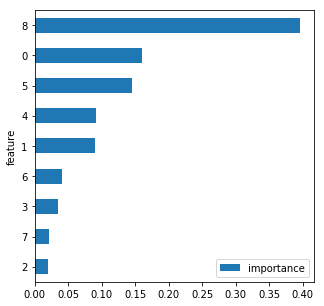

In [103]:
features = pd.DataFrame()
features['feature'] = data_scaled.columns
features['importance'] = g_clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)
features.plot(kind='barh', figsize=(5, 5))

In [76]:
!pip install nbconvert

You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [78]:
!pip install --upgrade pip

    100% |████████████████████████████████| 1.3MB 692kB/s ta 0:00:01
  Found existing installation: pip 9.0.1
    Uninstalling pip-9.0.1:
      Successfully uninstalled pip-9.0.1
